### Importing relavent libraries


In [207]:
import pandas as pd
import seaborn as sns

In [208]:
# Load the dataset
df = pd.read_csv("../Datasets/Marketing campaign dataset.csv")

In [209]:
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [210]:
print(df.dtypes)

campaign_item_id         int64
no_of_days               int64
time                    object
ext_service_id           int64
ext_service_name        object
creative_id              int64
creative_width         float64
creative_height        float64
search_tags             object
template_id            float64
landing_page            object
advertiser_id            int64
advertiser_name         object
network_id               int64
approved_budget        float64
advertiser_currency     object
channel_id               int64
channel_name            object
max_bid_cpm            float64
network_margin         float64
campaign_budget_usd    float64
impressions              int64
clicks                   int64
stats_currency          object
currency_code           object
exchange_rate            int64
media_cost_usd         float64
position_in_content    float64
unique_reach           float64
total_reach            float64
search_tag_cat          object
cmi_currency_code       object
timezone

#### Check for null values

In [211]:
print(df.isnull().sum(), len(df))

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

#### Removing unneeded columns

In [212]:
df = df.drop(columns=['total_reach','unique_reach','position_in_content','max_bid_cpm','network_margin','approved_budget','exchange_rate','stats_currency','advertiser_currency','cmi_currency_code'])

## Creative

#### Changing the creative columns to one column

In [213]:
df['creative_height'].unique()
df['creative_width'].unique()

array([300.,   0.,  nan])

In [214]:
df['creative_dimension'] = df['creative_height'] * df['creative_width']
df = df.drop(columns=['creative_height','creative_width'])

In [215]:
print(df.isnull().sum(), len(df))

campaign_item_id          0
no_of_days                0
time                      0
ext_service_id            0
ext_service_name          0
creative_id               0
search_tags               0
template_id            3412
landing_page              0
advertiser_id             0
advertiser_name           0
network_id                0
channel_id                0
channel_name              0
campaign_budget_usd       0
impressions               0
clicks                    0
currency_code             0
media_cost_usd            0
search_tag_cat            0
timezone                  0
weekday_cat               0
keywords                  0
creative_dimension     3412
dtype: int64 72612


## Template

In [216]:
df['template_id'].unique()

array([90., 23., 92., 89., 93., nan])

##### Leaving template as it is

In [217]:
df['creative_dimension'].unique()

array([75000.,     0.,    nan])

In [218]:
df['creative_id'].unique()

array([ 1000,  1005,  1010, ..., 15595, 15600, 15605], dtype=int64)

In [219]:
# Remove rows where 'creative_dimension' is null (NaN)
df = df.dropna(subset=['creative_dimension'])

# Check the cleaned dataframe
print(df.head())

   campaign_item_id  no_of_days        time  ext_service_id ext_service_name  \
0              2733           7  2022-05-01             128     Facebook Ads   
1              2733           8  2022-05-02              16            DV360   
2              2733           9  2022-05-03             128     Facebook Ads   
3              2733          10  2022-05-04             128     Facebook Ads   
4              2733          11  2022-05-05               4       Google Ads   

   creative_id                         search_tags  template_id  \
0         1000                     #The Power of X         90.0   
1         1000                      #Be Bold. Be X         90.0   
2         1000  #Embrace Your Individuality with X         90.0   
3         1000                      #Be Bold. Be X         90.0   
4         1000                      #Be Bold. Be X         90.0   

                                        landing_page  advertiser_id  ...  \
0  https://www.abcjewelry.com/collection

<Axes: xlabel='template_id', ylabel='creative_dimension'>

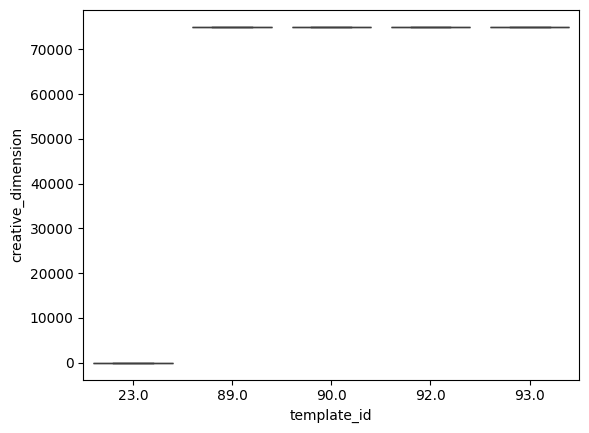

In [220]:
sns.boxplot(x=df['template_id'], y=df['creative_dimension'])

## Campaign id

In [221]:
df['campaign_item_id'].unique()

array([2733, 2766, 2802, 2850, 2851, 2879, 3223, 3054, 3132, 3150, 3149,
       3157, 3153, 3154, 3222, 3220, 3221, 3219, 3173, 3166, 3164, 3165,
       2934, 2949, 2950, 2952, 2977, 2980, 2982, 3033, 3034, 3035, 3038,
       3039, 3040, 3041, 3050, 3042, 3052, 3053, 3055, 3056, 3045, 3046,
       3047, 3048, 3049, 3051, 3057, 3058, 3098, 3099, 3100, 3101, 3102,
       3103, 3104, 3107, 3129, 3130, 3131, 3127, 3128, 3133, 3134, 3147,
       3148, 3151, 3152, 3155, 3156, 3158, 3159, 3160, 3161, 3162, 3163,
       3167, 3168, 3169, 3170, 3171, 3172, 3174, 3175, 3176, 3177, 3178,
       3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189,
       3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3199, 3200, 3201,
       3202, 3204, 3208, 3207, 3209, 3210, 3211, 3212, 3213, 3214, 3215,
       3216, 3217, 3218, 3354, 3355, 3389, 3444, 3445, 3486, 3488, 3543,
       3545, 3546, 3547, 3557, 3558, 3559, 3719, 3959, 3960], dtype=int64)

##### Applying embedding to the campaign_id feature. if not the model might miscalculate relationship. 

In [222]:
import torch
import torch.nn as nn

# Map each unique campaign_item_id to an index starting from 0
id_mapping = {id_: idx for idx, id_ in enumerate(df['campaign_item_id'].unique())}
df['campaign_index'] = df['campaign_item_id'].map(id_mapping)

# Number of unique campaigns
num_campaigns = len(id_mapping)  # Total unique campaign IDs
embedding_dim = 16  # Dimensionality of the embedding vectors

# Create an embedding layer
campaign_embedding = nn.Embedding(num_embeddings=num_campaigns, embedding_dim=embedding_dim)

# Convert campaign_index to tensor
campaign_indices = torch.tensor(df['campaign_index'].values, dtype=torch.long)

# Get the embeddings
embedded_campaigns = campaign_embedding(campaign_indices)
print("Embedding Shape:", embedded_campaigns.shape)  # Should match (num_samples, embedding_dim)




Embedding Shape: torch.Size([69200, 16])


In [223]:
# Print the mapping dictionary
print("Campaign ID to Index Mapping:")
for campaign_id, campaign_index in id_mapping.items():
    print(f"Campaign ID: {campaign_id} -> Campaign Index: {campaign_index}")


Campaign ID to Index Mapping:
Campaign ID: 2733 -> Campaign Index: 0
Campaign ID: 2766 -> Campaign Index: 1
Campaign ID: 2802 -> Campaign Index: 2
Campaign ID: 2850 -> Campaign Index: 3
Campaign ID: 2851 -> Campaign Index: 4
Campaign ID: 2879 -> Campaign Index: 5
Campaign ID: 3223 -> Campaign Index: 6
Campaign ID: 3054 -> Campaign Index: 7
Campaign ID: 3132 -> Campaign Index: 8
Campaign ID: 3150 -> Campaign Index: 9
Campaign ID: 3149 -> Campaign Index: 10
Campaign ID: 3157 -> Campaign Index: 11
Campaign ID: 3153 -> Campaign Index: 12
Campaign ID: 3154 -> Campaign Index: 13
Campaign ID: 3222 -> Campaign Index: 14
Campaign ID: 3220 -> Campaign Index: 15
Campaign ID: 3221 -> Campaign Index: 16
Campaign ID: 3219 -> Campaign Index: 17
Campaign ID: 3173 -> Campaign Index: 18
Campaign ID: 3166 -> Campaign Index: 19
Campaign ID: 3164 -> Campaign Index: 20
Campaign ID: 3165 -> Campaign Index: 21
Campaign ID: 2934 -> Campaign Index: 22
Campaign ID: 2949 -> Campaign Index: 23
Campaign ID: 2950 ->

## Number of Days

In [224]:
days = df['no_of_days']

# Calculate the minimum and maximum values
min_days = days.min()
max_days = days.max()

print(f"Minimum days: {min_days}")
print(f"Maximum days: {max_days}")

Minimum days: 0
Maximum days: 118


##### Normalizing this will be a good option for GNN

In [225]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'impressions' column
df['no_of_days'] = scaler.fit_transform(df[['no_of_days']])

# Check the result
print(df[['no_of_days']].head())

   no_of_days
0    0.059322
1    0.067797
2    0.076271
3    0.084746
4    0.093220


## Time


In [226]:
print(df[['time']].head())

         time
0  2022-05-01
1  2022-05-02
2  2022-05-03
3  2022-05-04
4  2022-05-05


##### Extract date components from time

In [227]:
# Convert the 'time' column to datetime format if it's not already
df['time'] = pd.to_datetime(df['time'])

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['time'].dt.dayofweek

# Extract month (1=January, 12=December)
df['month'] = df['time'].dt.month

# Extract day of the year (1-365/366)
df['day_of_year'] = df['time'].dt.dayofyear

df =df.drop(columns=['time'])

# Display the new date-related columns
print(df[['day_of_week', 'month', 'day_of_year']].head())



   day_of_week  month  day_of_year
0            6      5          121
1            0      5          122
2            1      5          123
3            2      5          124
4            3      5          125


In [228]:
df['campaign_budget_usd'].unique()

array([6.52173913e+02, 7.60000000e+02, 8.00000000e+02, 3.25000000e+02,
       4.00000000e+02, 5.00000000e+02, 1.80934870e+01, 6.98630688e+02,
       5.98780952e+02, 4.98984127e+02, 5.11640212e+02, 2.30000000e+03,
       8.93460490e+02, 4.35756972e+03, 2.01693227e+03, 5.24523161e+02,
       1.57356948e+03, 1.99318801e+03, 7.86648501e+02, 2.94277929e+02,
       4.94277929e+02, 4.11989101e+02, 1.02997275e+02, 3.67847410e+01,
       1.23433243e+02, 4.65395095e+02, 2.58583106e+02, 6.17983651e+02,
       2.94277930e+01, 5.42779292e+02, 3.99455041e+02, 2.66212534e+02,
       1.99727520e+02, 3.32697548e+02, 2.58855590e+01, 5.29700272e+02,
       3.40599460e+01, 3.41416894e+02, 1.33242507e+02, 8.00817439e+02,
       1.13896458e+02, 3.82833787e+02, 3.43051771e+02, 4.85013620e+01,
       1.86648501e+02, 4.45231608e+02, 2.47138965e+02, 2.42779292e+02,
       5.14986380e+01, 6.15803810e+01, 1.03542230e+01, 7.62942800e+00,
       8.71934600e+00, 1.96185290e+01, 3.15803815e+02, 1.97275204e+02,
      

## Week Cat

##### oneHot encoding the week_cat

In [229]:
# One-hot encoding the 'weekday_cat' column
df_one_hot = pd.get_dummies(df['weekday_cat'], prefix='weekday')

# Convert True/False to 1/0
df_one_hot = df_one_hot.astype(int)

# Combine the original DataFrame with the new one-hot encoded columns
df = pd.concat([df, df_one_hot], axis=1)

# Drop the original 'weekday_cat' column if it's no longer needed
df = df.drop(columns=['weekday_cat'])

print(df)


       campaign_item_id  no_of_days  ext_service_id ext_service_name  \
0                  2733    0.059322             128     Facebook Ads   
1                  2733    0.067797              16            DV360   
2                  2733    0.076271             128     Facebook Ads   
3                  2733    0.084746             128     Facebook Ads   
4                  2733    0.093220               4       Google Ads   
...                 ...         ...             ...              ...   
69195              3960    0.016949             128     Facebook Ads   
69196              3960    0.025424             128     Facebook Ads   
69197              3960    0.033898             128     Facebook Ads   
69198              3960    0.042373             128     Facebook Ads   
69199              3960    0.050847              16            DV360   

       creative_id                               search_tags  template_id  \
0             1000                           #The Power of

## Platform

#### Plateform of the advertisement

In [230]:
df['ext_service_id'].unique()
df['ext_service_name'].unique()

array(['Facebook Ads', 'DV360', 'Google Ads'], dtype=object)

##### Checking whether both are inter connected

In [231]:
# Create a combined feature by concatenating 'ext_service_id' and 'ext_service_name'
combined_feature = df[['ext_service_id', 'ext_service_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

   ext_service_id ext_service_name
0             128     Facebook Ads
1              16            DV360
4               4       Google Ads


#####  Encoding plateform ext_service_name


In [232]:
# Apply One-Hot Encoding to the 'ext_service_name' column
df_encoded = pd.get_dummies(df['ext_service_name'], prefix='plateform')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'ext_service_name' column
df.drop('ext_service_name', axis=1, inplace=True)

In [233]:
df.shape

(69200, 30)

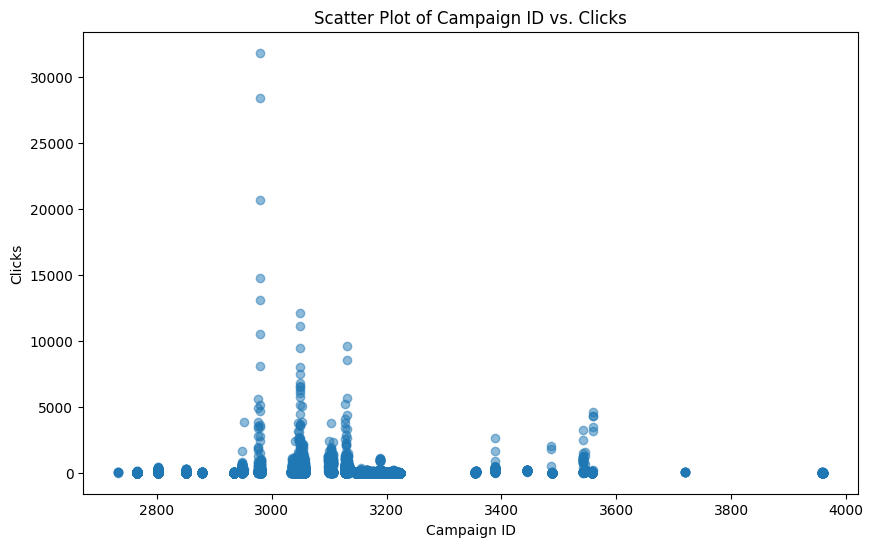

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['campaign_item_id'], df['clicks'], alpha=0.5)
plt.title('Scatter Plot of Campaign ID vs. Clicks')
plt.xlabel('Campaign ID')
plt.ylabel('Clicks')
plt.show()

## Time Zone

In [235]:
df['timezone'].unique()

array(['Asia/Singapore', 'America/New_York', 'Africa/Cairo', 'US/Eastern',
       'Asia/Kolkata', 'Asia/Muscat', 'Asia/Calcutta'], dtype=object)

In [236]:
# Apply One-Hot Encoding to the 'timezone' column
df_encoded = pd.get_dummies(df['timezone'], prefix='zone')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'search_tag_cat' column
df.drop('timezone', axis=1, inplace=True)

## Impression

In [237]:
print(df['impressions'])

0         837
1        2634
2        2135
3        2327
4        1538
         ... 
69195    1274
69196    1210
69197    1153
69198    1156
69199     590
Name: impressions, Length: 69200, dtype: int64


In [238]:
impressions = df['impressions']

# Calculate the minimum and maximum values
min_impressions = impressions.min()
max_impressions = impressions.max()

print(f"Minimum Impressions: {min_impressions}")
print(f"Maximum Impressions: {max_impressions}")

Minimum Impressions: 511
Maximum Impressions: 153959


##### Since we have larger different in the min max value. its better to normalize

In [239]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'impressions' column
df['normalized_impressions'] = scaler.fit_transform(df[['impressions']])

# Check the result
print(df[['impressions', 'normalized_impressions']].head())

   impressions  normalized_impressions
0          837                0.002124
1         2634                0.013835
2         2135                0.010583
3         2327                0.011835
4         1538                0.006693


In [240]:
df = df.drop(columns=['impressions'])

## Search tags

In [241]:
df['search_tags'].unique()

array(['#The Power of X', '#Be Bold. Be X',
       '#Embrace Your Individuality with X',
       '#The Ultimate Fashion Statement with X',
       '#The X Factor - Fashion for the Fearless', '#Timeless X Style'],
      dtype=object)

In [242]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

# Get unique search tags
unique_search_tags = df['search_tags'].unique()

# Create Word2Vec model
search_tag_model = Word2Vec(sentences=[[tag] for tag in unique_search_tags], vector_size=50, window=2, min_count=1, workers=4)

# Map each search tag to its embedding
def get_search_tag_embedding(tag):
    try:
        return search_tag_model.wv[tag]
    except KeyError:
        return np.zeros(50)

# Apply embeddings to the DataFrame
search_tag_embeddings = np.array([get_search_tag_embedding(tag) for tag in df['search_tags']])
search_tag_embedding_columns = [f'search_tag_emb_{i}' for i in range(50)]

# Add the embeddings as new columns in the original DataFrame
for i, column in enumerate(search_tag_embedding_columns):
    df[column] = search_tag_embeddings[:, i]

df = df.drop(columns=['search_tags'])
# Check the updated DataFrame
print(df)


       campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0                  2733    0.059322             128         1000         90.0   
1                  2733    0.067797              16         1000         90.0   
2                  2733    0.076271             128         1000         90.0   
3                  2733    0.084746             128         1000         90.0   
4                  2733    0.093220               4         1000         90.0   
...                 ...         ...             ...          ...          ...   
69195              3960    0.016949             128        13710         90.0   
69196              3960    0.025424             128        13710         90.0   
69197              3960    0.033898             128        13710         90.0   
69198              3960    0.042373             128        13710         90.0   
69199              3960    0.050847              16        13710         90.0   

                           

In [243]:
df.head()

,campaign_item_id,no_of_days,ext_service_id,creative_id,template_id,landing_page,advertiser_id,advertiser_name,network_id,channel_id,...,search_tag_emb_40,search_tag_emb_41,search_tag_emb_42,search_tag_emb_43,search_tag_emb_44,search_tag_emb_45,search_tag_emb_46,search_tag_emb_47,search_tag_emb_48,search_tag_emb_49
0,2733,0.059322,128,1000,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,32,...,-0.009019,0.011403,0.018360,-0.008200,0.015929,0.010751,0.011758,0.001025,0.016426,-0.014038
1,2733,0.067797,16,1000,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,8,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064
2,2733,0.076271,128,1000,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,8,...,0.002175,-0.003152,0.004393,-0.015763,-0.005434,0.005326,0.010693,-0.004783,-0.019020,0.009012
3,2733,0.084746,128,1000,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,64,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064
4,2733,0.093220,4,1000,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,32,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064


#### Perform text embedding for search tags which is most suitable for GNN. then Applying PCA to reduce the dimensionality

In [244]:
df['search_tag_cat'].unique()

array(['Others', 'Youtube', 'Inmarket', 'Retargeting', 'Affinity'],
      dtype=object)

##### Applying One-hot-encoding since theres no proper relationship

In [245]:
# Apply One-Hot Encoding to the 'search_tag_cat' column
df_encoded = pd.get_dummies(df['search_tag_cat'], prefix='search_cat')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'search_tag_cat' column
df.drop('search_tag_cat', axis=1, inplace=True)

## Landing page

In [246]:
df['landing_page'].unique()

array(['https://www.abcjewelry.com/collections/boho-jewelry-for-women',
       'https://www.abcjewelry.com/women/costume-jewelry/',
       'https://www.abcjewelry.com/collections/rhinestone-jewelry-for-women',
       'https://www.abcjewelry.com/collections',
       'https://www.abcjewelry.com/collections/gemstone-jewelry-for-women',
       'https://www.abcjewelry.com/collections/statement-necklaces-for-women',
       'https://www.abcjewelry.com/collections/bold-jewelry-for-women',
       'https://www.abcjewelry.com/collections/hoop-earrings-for-women',
       'https://www.abcjewelry.com/collections/layered-jewelry-for-women',
       'https://www.abcjewelry.com/collections/cuff-bracelets-for-women',
       'https://www.abcjewelry.com/collections/pendant-necklaces-for-women',
       'https://www.abcjewelry.com/collections/pearl-jewelry-for-women',
       'https://www.abcjewelry.com/women/boho-jewelry/',
       'https://www.abcjewelry.com/collections/beaded-jewelry-for-women',
       'htt

In [247]:
from urllib.parse import urlparse
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# Example DataFrame
# df['landing_page'] contains the URLs
unique_landing_pages = df['landing_page'].unique()

# Tokenize URLs into meaningful parts
def tokenize_url(url):
    parsed = urlparse(url)
    tokens = []
    # Extract domain and split into meaningful parts
    tokens.extend(parsed.netloc.split('.'))
    # Extract path and split into meaningful parts
    tokens.extend(parsed.path.split('/'))
    # Extract query parameters and split into meaningful parts
    tokens.extend(parsed.query.split('&'))
    # Remove empty and irrelevant tokens
    return [token for token in tokens if token and token not in {'www', 'com', 'html', 'htm'}]

# Tokenize all unique landing pages
tokenized_urls = [tokenize_url(url) for url in unique_landing_pages]

# Train Word2Vec model on tokenized URLs
landing_page_model = Word2Vec(sentences=tokenized_urls, vector_size=50, window=5, min_count=1, workers=4)

# Function to get embedding for a tokenized URL
def get_tokenized_url_embedding(url):
    tokens = tokenize_url(url)
    if tokens:
        # Average embedding for all tokens in the URL
        return np.mean([landing_page_model.wv[token] for token in tokens if token in landing_page_model.wv], axis=0)
    else:
        # Return a zero vector for URLs with no valid tokens
        return np.zeros(50)

# Apply the embeddings to the landing pages in the dataset
landing_page_embeddings = np.array([get_tokenized_url_embedding(url) for url in df['landing_page']])

# Convert embeddings to a DataFrame for later processing
landing_page_embedding_df = pd.DataFrame(landing_page_embeddings, columns=[f'landing_page_emb_{i}' for i in range(50)])

# Merge the embeddings into the original DataFrame
df = pd.concat([df, landing_page_embedding_df], axis=1)
df = df.drop(columns=['landing_page'])

print(df.head())


   campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0              2733    0.059322             128         1000         90.0   
1              2733    0.067797              16         1000         90.0   
2              2733    0.076271             128         1000         90.0   
3              2733    0.084746             128         1000         90.0   
4              2733    0.093220               4         1000         90.0   

   advertiser_id advertiser_name  network_id  channel_id channel_name  ...  \
0           4756             Web         190          32       Mobile  ...   
1           4756             Web         190           8       Social  ...   
2           4756             Web         190           8       Social  ...   
3           4756             Web         190          64        Video  ...   
4           4756             Web         190          32       Mobile  ...   

   landing_page_emb_40  landing_page_emb_41 landing_page_emb_42  \
0

In [248]:
print(df)

       campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0                  2733    0.059322             128         1000         90.0   
1                  2733    0.067797              16         1000         90.0   
2                  2733    0.076271             128         1000         90.0   
3                  2733    0.084746             128         1000         90.0   
4                  2733    0.093220               4         1000         90.0   
...                 ...         ...             ...          ...          ...   
69195              3960    0.016949             128        13710         90.0   
69196              3960    0.025424             128        13710         90.0   
69197              3960    0.033898             128        13710         90.0   
69198              3960    0.042373             128        13710         90.0   
69199              3960    0.050847              16        13710         90.0   

       advertiser_id advert

#### Check whether advertiser id and advertiser names are inter connected

In [249]:
# Create a combined feature by concatenating 'advertiser_id' and 'advertiser_name '
combined_feature = df[['advertiser_id', 'advertiser_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

       advertiser_id advertiser_name
0               4756             Web
5               5191           Brand
3586            5209           Brand
7126            5395           Luxor
7430            5227      Almaza Bay
7601            5611             USA
7646            5785             USA
7816            5641       Karnataka
7830            5686     Maharashtra
7843            6382            Oman
13636           6391             UAE
15286           5857           Cairo
15672           5914       Al Ahmadi
15782           5908     Addis Ababa
15910           5917        Vadodara
16103           5938         Chennai
16105           6112      Coimbatore
16198           5755           Malad
16262           6019          Indore
16483           6340            Pali
16487           6292  Andhra Pradesh
17185           6337    Kuala Lumpur
18003           6298         Gujarat
18602           6325        Chandpur
18647           6316     West Bengal
19424           6331      Tamil Nadu
1

In [250]:
# Create a combined feature by concatenating 'advertiser_id' and 'advertiser_name'
combined_feature = df[['advertiser_id', 'advertiser_name']]

# 1. Check if there are multiple names for the same 'advertiser_id'
multiple_names_for_id = combined_feature.groupby('advertiser_id')['advertiser_name'].nunique()
multiple_names_for_id = multiple_names_for_id[multiple_names_for_id > 1]  # Filter for IDs with more than 1 name
print("Multiple names for the same 'advertiser_id':")
print(multiple_names_for_id)

# 2. Check if there are multiple IDs for the same 'advertiser_name'
multiple_ids_for_name = combined_feature.groupby('advertiser_name')['advertiser_id'].nunique()
multiple_ids_for_name = multiple_ids_for_name[multiple_ids_for_name > 1]  # Filter for names with more than 1 ID
print("\nMultiple IDs for the same 'advertiser_name':")
print(multiple_ids_for_name)


Multiple names for the same 'advertiser_id':
Series([], Name: advertiser_name, dtype: int64)

Multiple IDs for the same 'advertiser_name':
advertiser_name
Brand         2
Chattogram    2
USA           2
Name: advertiser_id, dtype: int64


## Network ID

In [251]:
df['network_id'].unique()

array([190, 287, 191, 188, 353, 350], dtype=int64)

In [252]:
# Apply One-Hot Encoding to the 'currency_code' column
df_encoded = pd.get_dummies(df['currency_code'], prefix='currency')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'currency_code' column
df.drop('currency_code', axis=1, inplace=True)

print(df.head())

   campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0              2733    0.059322             128         1000         90.0   
1              2733    0.067797              16         1000         90.0   
2              2733    0.076271             128         1000         90.0   
3              2733    0.084746             128         1000         90.0   
4              2733    0.093220               4         1000         90.0   

   advertiser_id advertiser_name  network_id  channel_id channel_name  ...  \
0           4756             Web         190          32       Mobile  ...   
1           4756             Web         190           8       Social  ...   
2           4756             Web         190           8       Social  ...   
3           4756             Web         190          64        Video  ...   
4           4756             Web         190          32       Mobile  ...   

   landing_page_emb_45  landing_page_emb_46  landing_page_emb_47  \


## Channel

In [253]:
df['channel_id'].unique()

array([32,  8, 64,  1,  4], dtype=int64)

In [254]:
df['channel_name'].unique()

array(['Mobile', 'Social', 'Video', 'Display', 'Search'], dtype=object)

In [255]:
# Apply One-Hot Encoding to the 'channel name' column
df_encoded = pd.get_dummies(df['channel_name'], prefix='channel')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'channel_name' column
df.drop('channel_name', axis=1, inplace=True)

In [256]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the 'campaign_budget_usd' column
df['campaign_budget_usd'] = scaler.fit_transform(df[['campaign_budget_usd']])

# Display the updated DataFrame with the scaled feature
print(df.head())

   campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0              2733    0.059322             128         1000         90.0   
1              2733    0.067797              16         1000         90.0   
2              2733    0.076271             128         1000         90.0   
3              2733    0.084746             128         1000         90.0   
4              2733    0.093220               4         1000         90.0   

   advertiser_id advertiser_name  network_id  channel_id  campaign_budget_usd  \
0           4756             Web         190          32             0.201396   
1           4756             Web         190           8             0.201396   
2           4756             Web         190           8             0.201396   
3           4756             Web         190          64             0.201396   
4           4756             Web         190          32             0.201396   

   ...  currency_AED  currency_EGP currency_INR  c

In [257]:
df['media_cost_usd'].unique()

array([ 14.058514,  99.633496, 109.419677, ...,  16.46014 ,  16.374037,
         1.751098])

In [258]:
print(df['media_cost_usd'].max(), df['media_cost_usd'].min())


2295.028945 0.0


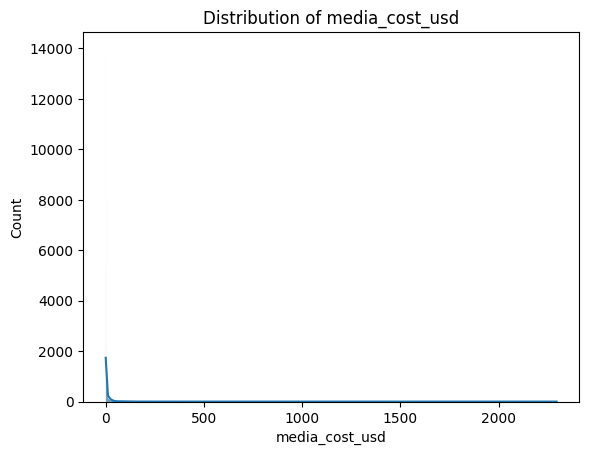

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['media_cost_usd'], kde=True)
plt.title('Distribution of media_cost_usd')
plt.show()

In [260]:
import numpy as np
df['media_cost_usd_log'] = np.log1p(df['media_cost_usd'])  # Use log1p to handle zero values


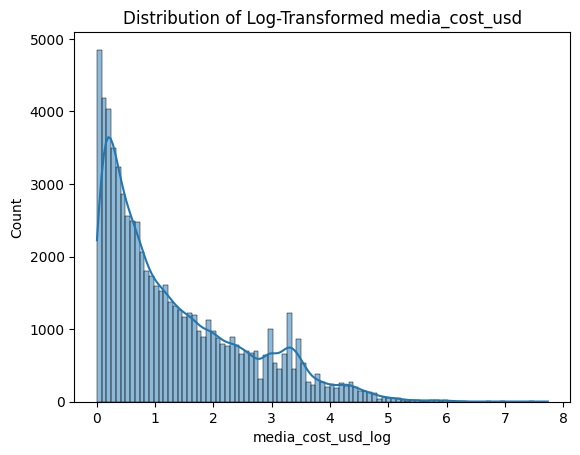

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['media_cost_usd_log'], kde=True)
plt.title('Distribution of Log-Transformed media_cost_usd')
plt.show()


In [262]:
df[['media_cost_usd_log', 'media_cost_usd']]

,media_cost_usd_log,media_cost_usd
0,2.711944,14.058514
1,4.611485,99.633496
2,4.704288,109.419677
3,4.755395,115.209499
4,4.219362,66.990104
...,...,...
69195,3.064303,20.419520
69196,2.993245,18.950320
69197,2.859921,16.460140
69198,2.854977,16.374037


In [263]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the 'campaign_budget_usd' column
df['media_cost_usd'] = scaler.fit_transform(df[['media_cost_usd']])

df =df.drop(columns=['media_cost_usd_log'])
# Display the updated DataFrame with the scaled feature
print(df.head())

   campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0              2733    0.059322             128         1000         90.0   
1              2733    0.067797              16         1000         90.0   
2              2733    0.076271             128         1000         90.0   
3              2733    0.084746             128         1000         90.0   
4              2733    0.093220               4         1000         90.0   

   advertiser_id advertiser_name  network_id  channel_id  campaign_budget_usd  \
0           4756             Web         190          32             0.201396   
1           4756             Web         190           8             0.201396   
2           4756             Web         190           8             0.201396   
3           4756             Web         190          64             0.201396   
4           4756             Web         190          32             0.201396   

   ...  currency_AED  currency_EGP currency_INR  c

## Keywords

In [264]:
df['keywords'].unique()

array(['delicate bracelets', 'summer jewelry', 'artisan jewelry',
       'layered bracelets', 'minimalist jewelry', 'beaded bracelets',
       'bridal jewelry', 'unique and trendy jewelry', 'clip-on earrings',
       'bohemian jewelry', 'layered jewelry', 'tribal jewelry',
       'rhinestone jewelry', 'statement rings', 'mixed metal jewelry',
       'chic and affordable jewelry', 'colorful jewelry', 'funky jewelry',
       'cuff bracelets', 'elegant and modern jewelry',
       'fashionable jewelry', 'statement necklaces', 'bold jewelry',
       'seashell jewelry', 'party jewelry', 'modern jewelry',
       'winter jewelry', 'seasonal jewelry', 'drop earrings',
       'charm bracelets', 'costume jewelry sets', 'pendant necklaces',
       'fashion jewelry for women', 'bangles', 'chic jewelry',
       'vintage-inspired jewelry', 'dazzling jewelry', 'spring jewelry',
       'stud earrings', 'beach jewelry', 'vibrant jewelry',
       'fashion brooches', 'gemstone jewelry', 'toe rings',
     

In [265]:
# Step 1: Generate unique keyword embeddings
keywords = df['keywords'].unique()  # Get unique keywords from your dataframe
embedding_model = Word2Vec(sentences=[[keyword] for keyword in keywords], vector_size=50, window=5, min_count=1, workers=4)

def get_keyword_embedding(keyword):
    try:
        return embedding_model.wv[keyword]
    except KeyError:
        return np.zeros(50)  # Default embedding in case keyword is not found

# Step 2: Create a dictionary mapping each keyword to its embedding
keyword_to_embedding = {keyword: get_keyword_embedding(keyword) for keyword in keywords}

# Step 3: Map embeddings back to the original DataFrame
# Create a DataFrame with the mapped embeddings for each record in df
keyword_embeddings_mapped = np.array([keyword_to_embedding[keyword] for keyword in df['keywords']])
keyword_embeddings_df = pd.DataFrame(keyword_embeddings_mapped, columns=[f'keyword_{i}' for i in range(50)])

# Step 4: Concatenate the embeddings back to the original DataFrame
df = pd.concat([df.drop(columns=['keywords']), keyword_embeddings_df], axis=1)

# Verify the result
print(df)


       campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0                  2733    0.059322             128         1000         90.0   
1                  2733    0.067797              16         1000         90.0   
2                  2733    0.076271             128         1000         90.0   
3                  2733    0.084746             128         1000         90.0   
4                  2733    0.093220               4         1000         90.0   
...                 ...         ...             ...          ...          ...   
69195              3960    0.016949             128        13710         90.0   
69196              3960    0.025424             128        13710         90.0   
69197              3960    0.033898             128        13710         90.0   
69198              3960    0.042373             128        13710         90.0   
69199              3960    0.050847              16        13710         90.0   

       advertiser_id advert

In [266]:
print(df)

       campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0                  2733    0.059322             128         1000         90.0   
1                  2733    0.067797              16         1000         90.0   
2                  2733    0.076271             128         1000         90.0   
3                  2733    0.084746             128         1000         90.0   
4                  2733    0.093220               4         1000         90.0   
...                 ...         ...             ...          ...          ...   
69195              3960    0.016949             128        13710         90.0   
69196              3960    0.025424             128        13710         90.0   
69197              3960    0.033898             128        13710         90.0   
69198              3960    0.042373             128        13710         90.0   
69199              3960    0.050847              16        13710         90.0   

       advertiser_id advert

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69200 entries, 0 to 69199
Columns: 195 entries, campaign_item_id to keyword_49
dtypes: float32(150), float64(6), int32(30), int64(8), object(1)
memory usage: 56.0+ MB


In [268]:
df['advertiser_name'].unique()

array(['Web', 'Brand', 'Luxor', 'Almaza Bay', 'USA', 'Karnataka',
       'Maharashtra', 'Oman', 'UAE', 'Cairo', 'Al Ahmadi', 'Addis Ababa',
       'Vadodara', 'Chennai', 'Coimbatore', 'Malad', 'Indore', 'Pali',
       'Andhra Pradesh', 'Kuala Lumpur', 'Gujarat', 'Chandpur',
       'West Bengal', 'Tamil Nadu', 'Madhya Pradesh', 'Orissa', 'North',
       'Thailand', 'Singapore', 'Sohar', 'KSA', 'Qatar', 'Muscat',
       'Kuwait', 'Bahrain', 'Malaysia', 'Jeddah', 'Chattogram',
       'Pan India'], dtype=object)

In [269]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

# Assuming `df` is your DataFrame with an 'advertiser' column

# Step 1: Get unique advertiser values
unique_advertisers = df['advertiser_name'].unique()

# Step 2: Train Word2Vec on advertiser data
advertiser_model = Word2Vec(sentences=[[adv] for adv in unique_advertisers], vector_size=50, window=2, min_count=1, workers=4)

# Step 3: Function to get advertiser embeddings
def get_advertiser_embedding(adv):
    try:
        return advertiser_model.wv[adv]
    except KeyError:
        return np.zeros(50)  # Zero vector for unknown advertisers

# Step 4: Generate embeddings for each advertiser in the dataset
advertiser_embeddings = np.array([get_advertiser_embedding(adv) for adv in df['advertiser_name']])

# Step 5: Convert embeddings to a DataFrame
advertiser_embedding_df = pd.DataFrame(advertiser_embeddings, columns=[f'advertiser_emb_{i}' for i in range(50)])

# Step 6: Add embeddings to the original DataFrame
df = pd.concat([df, advertiser_embedding_df], axis=1)
df = df.drop(columns=['advertiser_name'])

# Check the result
print(df.head())


   campaign_item_id  no_of_days  ext_service_id  creative_id  template_id  \
0              2733    0.059322             128         1000         90.0   
1              2733    0.067797              16         1000         90.0   
2              2733    0.076271             128         1000         90.0   
3              2733    0.084746             128         1000         90.0   
4              2733    0.093220               4         1000         90.0   

   advertiser_id  network_id  channel_id  campaign_budget_usd  clicks  ...  \
0           4756         190          32             0.201396       8  ...   
1           4756         190           8             0.201396      44  ...   
2           4756         190           8             0.201396      32  ...   
3           4756         190          64             0.201396      48  ...   
4           4756         190          32             0.201396      20  ...   

   advertiser_emb_40  advertiser_emb_41  advertiser_emb_42  advertis

In [270]:
df['campaign_index']

0          0
1          0
2          0
3          0
4          0
        ... 
69195    140
69196    140
69197    140
69198    140
69199    140
Name: campaign_index, Length: 69200, dtype: int64

In [271]:
# Find columns with null values
null_columns = df.columns[df.isnull().any()]

# Display columns with null values and their respective counts
null_counts = df[null_columns].isnull().sum()

print("Columns with null values:")
print(null_counts)


Columns with null values:
Series([], dtype: float64)


In [272]:
# Save the final DataFrame to a CSV file
final_csv_path = '../Datasets/processed_data.csv'
df.to_csv(final_csv_path, index=False)

print(f"Final DataFrame saved to {final_csv_path}")

Final DataFrame saved to ../Datasets/processed_data.csv
